In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
from Box_cox import X1, Y

In [ ]:
X1.columns

# Correlation Matrix

In [16]:
cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio']

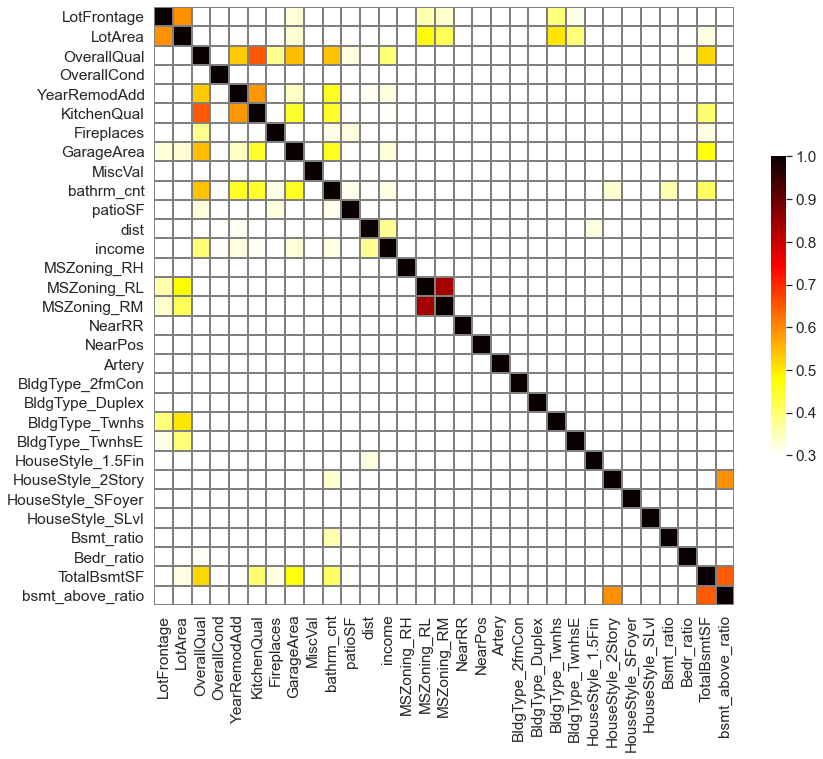

In [15]:
from copy import copy


train_corr = X1[cols].corr()
train_corr = abs(train_corr)
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

#conditions for filtering 0.6<=r<=0.9
sns.set(font_scale=1.4)

cmap =  copy(plt.cm.hot_r)
cmap.set_over("white")
cmap.set_under("white")


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(abs(train_corr),
                vmax = 1,
                vmin = 0.3,
                cmap = cmap,
                cbar_kws = {'shrink':.5},
                linewidth = 1,
               linecolor = "grey");




In [7]:
# Drop: MSZoning_RL, YearRemodAdd, OveralQual, TotalBsmtSF, LotFrontage

cols = ['LotArea', 'OverallCond',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'MSZoning_RH', 
        'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 
        'bsmt_above_ratio']

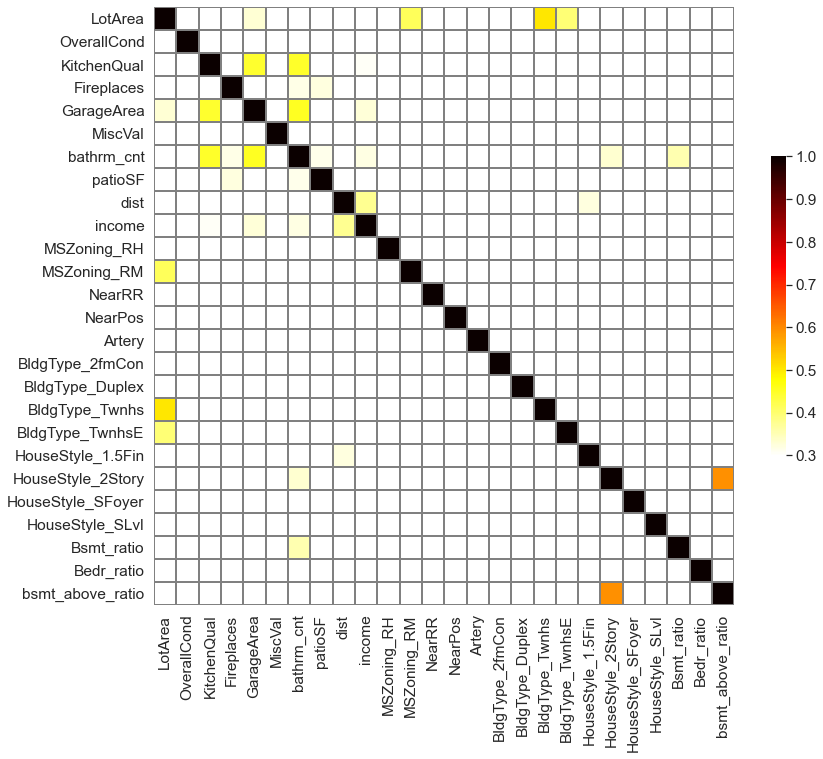

In [8]:
train_corr = X1[cols].corr()
train_corr = abs(train_corr)
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

#conditions for filtering 0.6<=r<=0.9
sns.set(font_scale=1.4)

cmap =  copy(plt.cm.hot_r)
cmap.set_over("white")
cmap.set_under("white")


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(abs(train_corr),
                vmax = 1,
                vmin = 0.3,
                cmap = cmap,
                cbar_kws = {'shrink':.5},
                linewidth = 1,
               linecolor = "grey");

In [19]:
cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income','Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio']

In [20]:
X1_num = X1[cols]

# Check Multicorrelation

In [21]:
def calc_VIF(df):
    names = df.columns
    values = df.values
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = names
    
    vif_data["VIF"] = [variance_inflation_factor(values, i)
                          for i in range(len(names))]
    
      
    vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
    print(vif_data)


In [22]:
calc_VIF(X1_num)

             feature         VIF
4       YearRemodAdd  455.309188
1            LotArea  362.598936
5        KitchenQual   58.964799
2        OverallQual   58.010327
15       TotalBsmtSF   35.040907
3        OverallCond   32.187096
16  bsmt_above_ratio   28.800718
14        Bedr_ratio   25.533741
9         bathrm_cnt   21.558226
0        LotFrontage   21.328195
12            income   13.813975
11              dist   12.845752
7         GarageArea   10.978727
10           patioSF    4.140939
13        Bsmt_ratio    3.344379
6         Fireplaces    2.727373
8            MiscVal    1.019868


In [23]:
X1_num.drop('YearRemodAdd', axis = 1, inplace = True)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
calc_VIF(X1_num)

             feature         VIF
1            LotArea  116.176354
4        KitchenQual   55.438877
2        OverallQual   54.439501
14       TotalBsmtSF   32.028057
3        OverallCond   29.800859
15  bsmt_above_ratio   26.636355
13        Bedr_ratio   24.129568
8         bathrm_cnt   21.226641
0        LotFrontage   19.451148
11            income   13.399885
10              dist   12.674118
6         GarageArea   10.756153
9            patioSF    4.110436
12        Bsmt_ratio    3.335636
5         Fireplaces    2.713436
7            MiscVal    1.017008


In [25]:
X1_num.drop('LotArea', axis = 1, inplace = True)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
calc_VIF(X1_num)

             feature        VIF
1        OverallQual  53.943331
3        KitchenQual  53.488195
13       TotalBsmtSF  31.634170
14  bsmt_above_ratio  25.570964
2        OverallCond  24.312824
7         bathrm_cnt  20.600075
12        Bedr_ratio  18.761952
0        LotFrontage  14.756956
10            income  13.345128
9               dist  12.570721
5         GarageArea  10.729002
8            patioSF   4.091670
11        Bsmt_ratio   3.320278
4         Fireplaces   2.672449
6            MiscVal   1.014496


In [27]:
X1_num.drop('OverallQual', axis = 1, inplace = True)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
calc_VIF(X1_num)

             feature        VIF
2        KitchenQual  41.114700
12       TotalBsmtSF  30.438746
13  bsmt_above_ratio  25.433815
1        OverallCond  23.523112
6         bathrm_cnt  19.731375
11        Bedr_ratio  18.761939
0        LotFrontage  14.754320
9             income  12.798171
8               dist  12.555471
4         GarageArea  10.432886
7            patioSF   4.089653
10        Bsmt_ratio   3.244850
3         Fireplaces   2.609555
5            MiscVal   1.014469


In [29]:
X1_num.drop('TotalBsmtSF', axis = 1, inplace = True)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
calc_VIF(X1_num)

             feature        VIF
2        KitchenQual  40.535485
1        OverallCond  21.930328
11        Bedr_ratio  18.326419
6         bathrm_cnt  16.573333
0        LotFrontage  14.505053
9             income  12.764287
8               dist  12.372639
4         GarageArea   9.743622
12  bsmt_above_ratio   9.188982
7            patioSF   4.021457
10        Bsmt_ratio   2.999692
3         Fireplaces   2.405595
5            MiscVal   1.014126


In [31]:
X1_num.drop('OverallCond', axis = 1, inplace = True)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
calc_VIF(X1_num)

             feature        VIF
1        KitchenQual  32.755658
5         bathrm_cnt  16.251208
0        LotFrontage  14.290303
10        Bedr_ratio  14.267697
8             income  12.728536
7               dist  12.372639
3         GarageArea   9.613095
11  bsmt_above_ratio   9.162160
6            patioSF   4.001001
9         Bsmt_ratio   2.969878
2         Fireplaces   2.404875
4            MiscVal   1.012404
